# <center>Introduction to Data Science</center> 
### <center>K-Nearest Neighbors (K-NN) Project 1</center>
### <center>Patient Treatment Classification</center>
### **<div align="right">By: Pujesh Pradhan </div>**

### Table of Content
* [Objective and Data Description](#Objective-and-Data-Description)
* [Statistical Numerical and Graphical Summaries](#Statistical-Numerical-and-Graphical-Summaries)
* [Algorithm Implementation and Statistical Tests](#Algorithm-Implementation-and-Statistical-Tests)
* [Performance Improvement](#Performance-Improvement)
* [Conclusion](#Conclusion)

### Objective and Data Description

#### Overview
Based on either the treatment/procedures, lab results or the condition of a patient, medical facility decides whether the patient needs to be assigned either as Inpatient or Outpatient. Inpatient care requires patient to stay at the medical facility for atleast a night while patient receiving outpatient cares needs not to spend a night. 
The dataset contains records of various laboratory test results, age and gender of several patients and determines if the patient needs to be admitted to the medical facility or not. 

#### Objective
**With the help of this dataset we would like to predict whether the patient requires a Inpatient care or Outpatient care.**

#### About the Dataset
This dataset is being used from the Kaggle website and the URL to the dataset is: [Patient Treatment](https://www.kaggle.com/manishkc06/patient-treatment-classification)

It has 11 fields and the description of each field of the dataset are: 
1. **HAEMATOCRIT** - Laboratory test result of haematocrit (measures the ratio of the volume of red blood cells to the total volume of blood)
2. **HAEMOGLOBINS** - Laboratory test result of haemoglobins (measures the iron-containing protein in blood that is essential for oxygen transport)
3. **ERYTHROCYTE** - Laboratory test result of erythrocyte (measures the degree of inflammation present in the body)
4. **LEUCOCYTE** - Laboratory test result of leucocyte (measures the level of leukocytes, or white blood cells)
5. **THROMBOCYTE** - Laboratory test result of thrombocyte (measures the number of platelets in your blood)
6. **MCH** - Laboratory test result of MCH (measures the average amount in each of the red blood cells of a protein which carries oxygen around your body)
7. **MCHC** - Laboratory test result of MCHC (measures the average amount of hemoglobin in a group of red blood cells)
8. **MCV** - Laboratory test result of MCV (measures the average size of your red blood cells)
9. **AGE** - Age of the patient 
10. **SEX** - Gender of the patient 
11. **SOURCE** - Inpatient care or Outpatient care (1=Inpatient, 0=Outpatient)

In [2]:
#All the necessary packages are imported here.
import numpy as np

import pandas as pd 
from pandas.plotting import scatter_matrix

import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

from math import sqrt

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Describing the size, shape and dimension of the dataset.
patient_data = pd.read_csv('patient_treatment.csv') 
print("The total size of the dataset is {} bytes.".format(patient_data.size))
print("There are {} number of records and {} number of fields with a {} shape.".format(patient_data.shape[0], patient_data.shape[1], patient_data.shape))
print("The dataset has a {} dimension structure.".format(patient_data.ndim))

The total size of the dataset is 36399 bytes.
There are 3309 number of records and 11 number of fields with a (3309, 11) shape.
The dataset has a 2 dimension structure.


In [4]:
print("The top 5 records of the dataset are: \n{}".format(patient_data.head()))

The top 5 records of the dataset are: 
   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         33.8          11.1         4.18        4.6          150  26.6  32.8   
1         44.6          14.0         6.86        6.3          232  20.4  31.4   
2         42.9          14.0         4.57        6.2          336  30.6  32.6   
3         41.9          14.4         4.67        3.5          276  30.8  34.4   
4         40.6          13.3         4.85       14.9          711  27.4  32.8   

    MCV  AGE SEX  SOURCE  
0  80.9   33   F       1  
1  65.0   36   M       0  
2  93.9   70   F       0  
3  89.7   18   F       0  
4  83.7   36   M       0  


In [5]:
#Since, K-NN algorithm works well with numerical data we are 
#replacing the values F as 1 and M as 1 in the sex field of the dataset.

patient_data['SEX'] = patient_data['SEX'].replace(['F', 'M'], [1, 0])
print("The top 5 updated records of the dataset are: \n{}".format(patient_data.head()))

The top 5 updated records of the dataset are: 
   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         33.8          11.1         4.18        4.6          150  26.6  32.8   
1         44.6          14.0         6.86        6.3          232  20.4  31.4   
2         42.9          14.0         4.57        6.2          336  30.6  32.6   
3         41.9          14.4         4.67        3.5          276  30.8  34.4   
4         40.6          13.3         4.85       14.9          711  27.4  32.8   

    MCV  AGE  SEX  SOURCE  
0  80.9   33    1       1  
1  65.0   36    0       0  
2  93.9   70    1       0  
3  89.7   18    1       0  
4  83.7   36    0       0  


In [6]:
#Printing the data types
print("The datatype of the dataset are: \n{}".format(patient_data.dtypes))

The datatype of the dataset are: 
HAEMATOCRIT     float64
HAEMOGLOBINS    float64
ERYTHROCYTE     float64
LEUCOCYTE       float64
THROMBOCYTE       int64
MCH             float64
MCHC            float64
MCV             float64
AGE               int64
SEX               int64
SOURCE            int64
dtype: object


In [7]:
#Statistical description of the data
print(patient_data.describe().T)

               count        mean         std    min     25%     50%     75%  \
HAEMATOCRIT   3309.0   38.226111    5.971943  13.70   34.30   38.70   42.50   
HAEMOGLOBINS  3309.0   12.749350    2.084325   3.80   11.40   12.90   14.20   
ERYTHROCYTE   3309.0    4.544802    0.784510   1.48    4.04    4.58    5.06   
LEUCOCYTE     3309.0    8.715533    4.991299   1.10    5.70    7.60   10.30   
THROMBOCYTE   3309.0  258.893019  112.676139  10.00  191.00  257.00  322.00   
MCH           3309.0   28.230039    2.696520  14.90   27.20   28.70   29.80   
MCHC          3309.0   33.336476    1.247055  26.00   32.70   33.40   34.10   
MCV           3309.0   84.611333    6.916079  54.00   81.50   85.30   88.80   
AGE           3309.0   46.644303   21.874106   1.00   29.00   48.00   64.00   
SEX           3309.0    0.473255    0.499360   0.00    0.00    0.00    1.00   
SOURCE        3309.0    0.398005    0.489561   0.00    0.00    0.00    1.00   

                  max  
HAEMATOCRIT     69.00  
HAE

### Statistical Numerical and Graphical Summaries

The scatter matrix can be constructed to display how the data are distributed across the dataset.



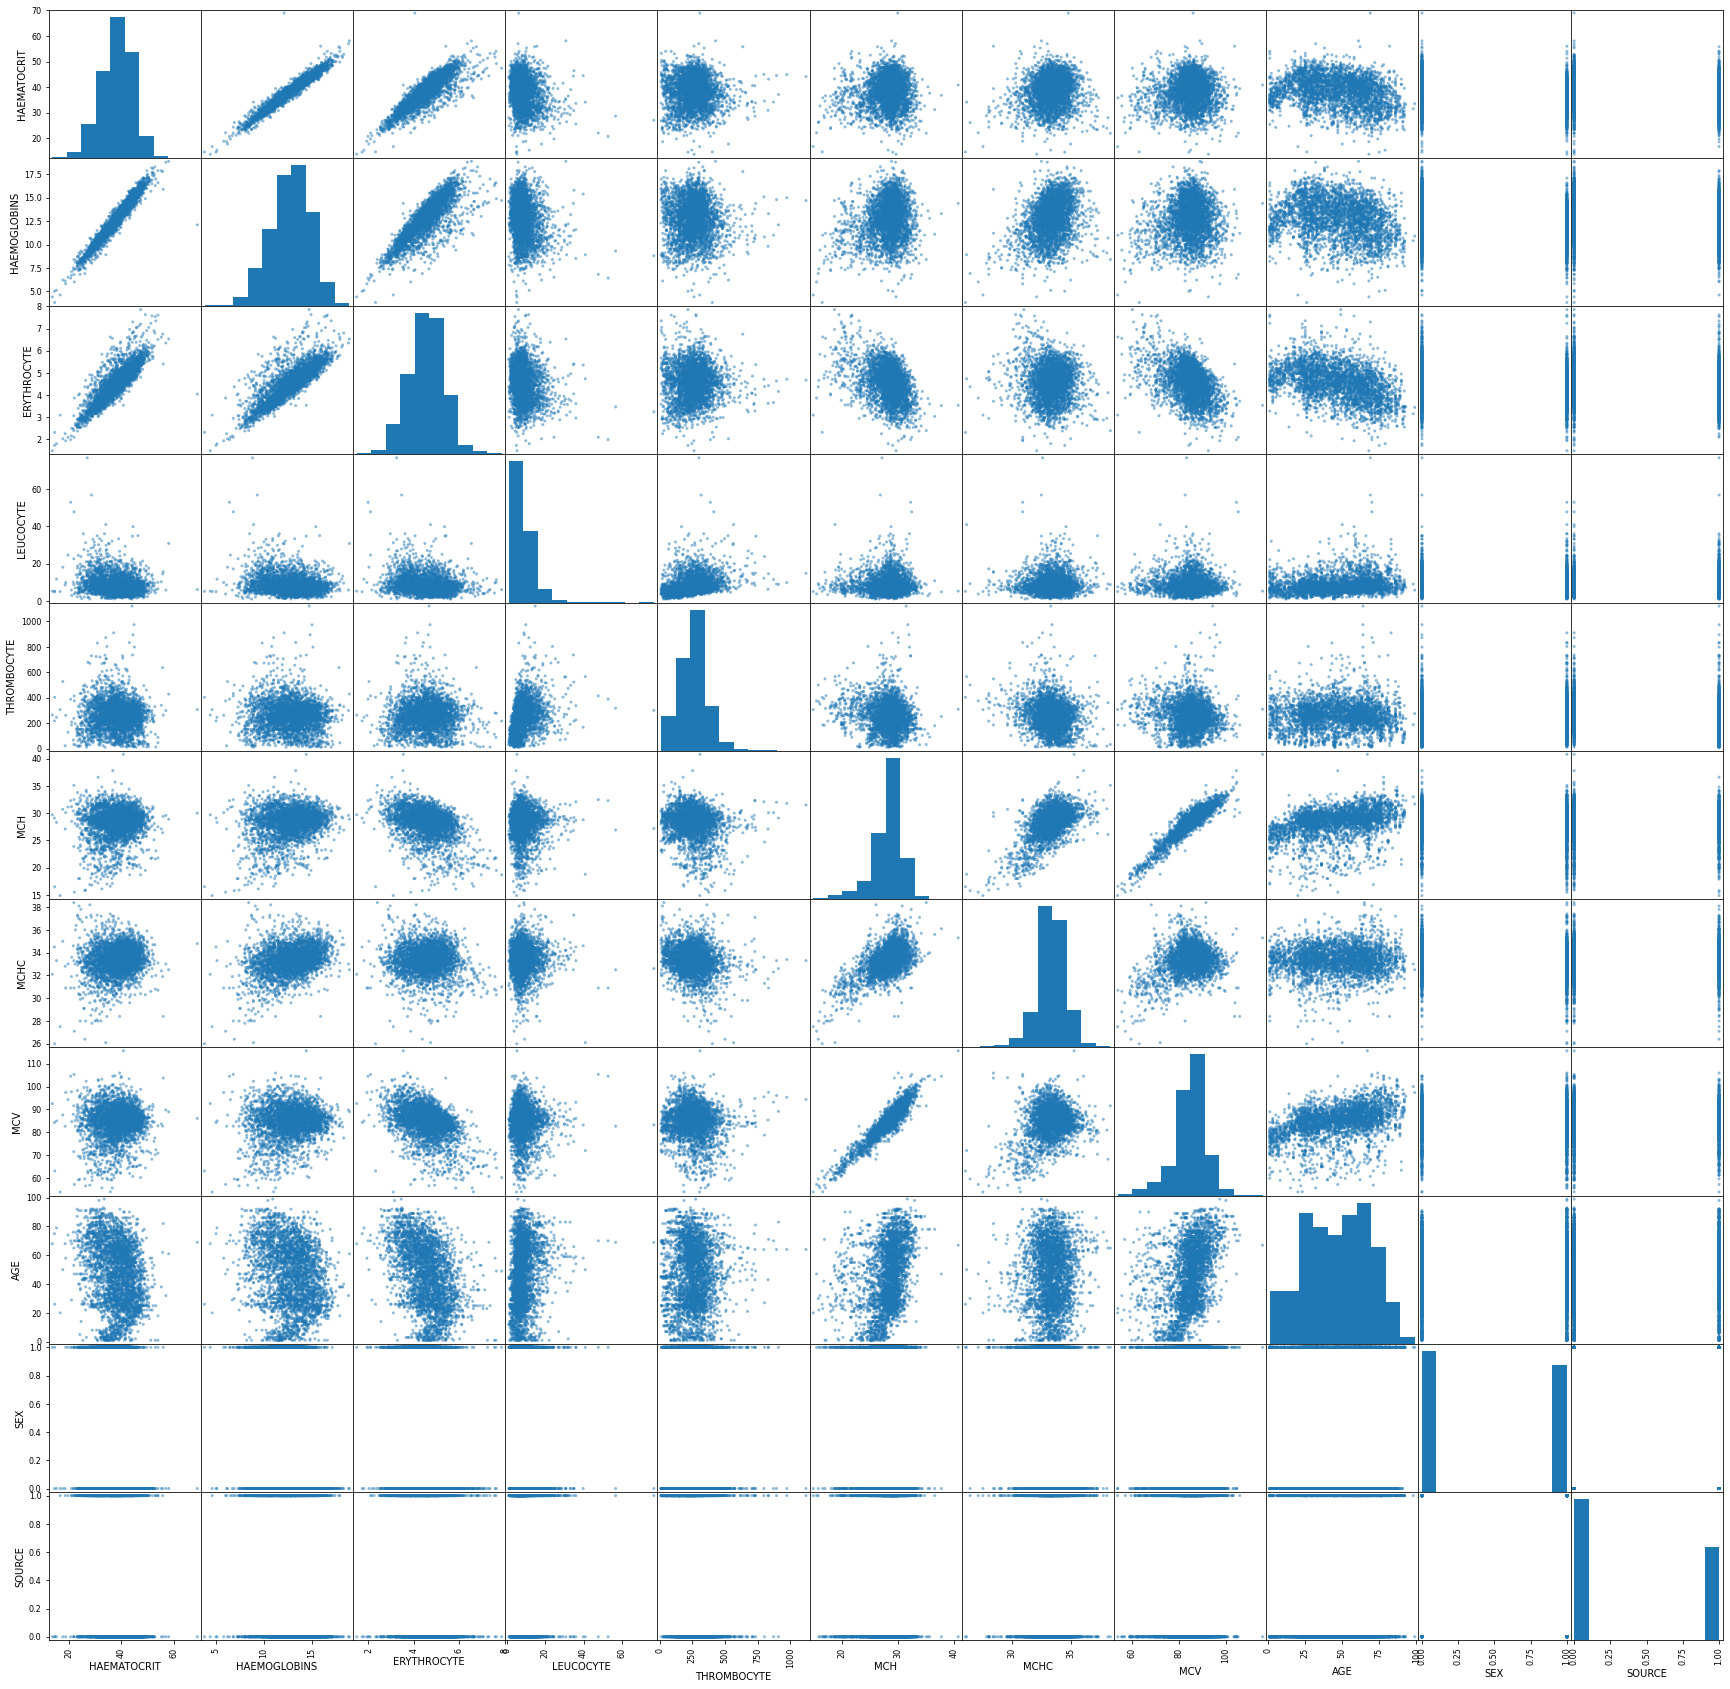

In [8]:
print("The scatter matrix can be constructed to display how the data are distributed across the dataset.\n")

_scatter_matrix_data = scatter_matrix(patient_data, figsize=(30,30), diagonal='hist')

In [8]:
print("From the above graph while considering the histograms diagonally we can see that most of the fields are normally distributed. \
    \nWhereas from the scatter plot we can see there are few outliers in the dataset. \
    \nBelow is the list of all the keys of the dataset and determines whether they are normally distributed or skewed. \n")

for data_keys in patient_data.keys():
      skewness = patient_data[data_keys].skew()
      if skewness > 0: 
          print(data_keys, "is Right Skewed")
      elif skewness <0:
          print(data_keys, "is Left Skewed")
      else:
          print(data_keys, "is Normally Distributed")

From the above graph while considering the histograms diagonally we can see that most of the fields are normally distributed.     
Whereas from the scatter plot we can see there are few outliers in the dataset.     
Below is the list of all the keys of the dataset and determines whether they are normally distributed or skewed. 

HAEMATOCRIT is Left Skewed
HAEMOGLOBINS is Left Skewed
ERYTHROCYTE is Left Skewed
LEUCOCYTE is Right Skewed
THROMBOCYTE is Right Skewed
MCH is Left Skewed
MCHC is Left Skewed
MCV is Left Skewed
AGE is Left Skewed
SEX is Right Skewed
SOURCE is Right Skewed


We can further modify the graph using the pairplot to determine what data fall under Inpatient or Outpatient


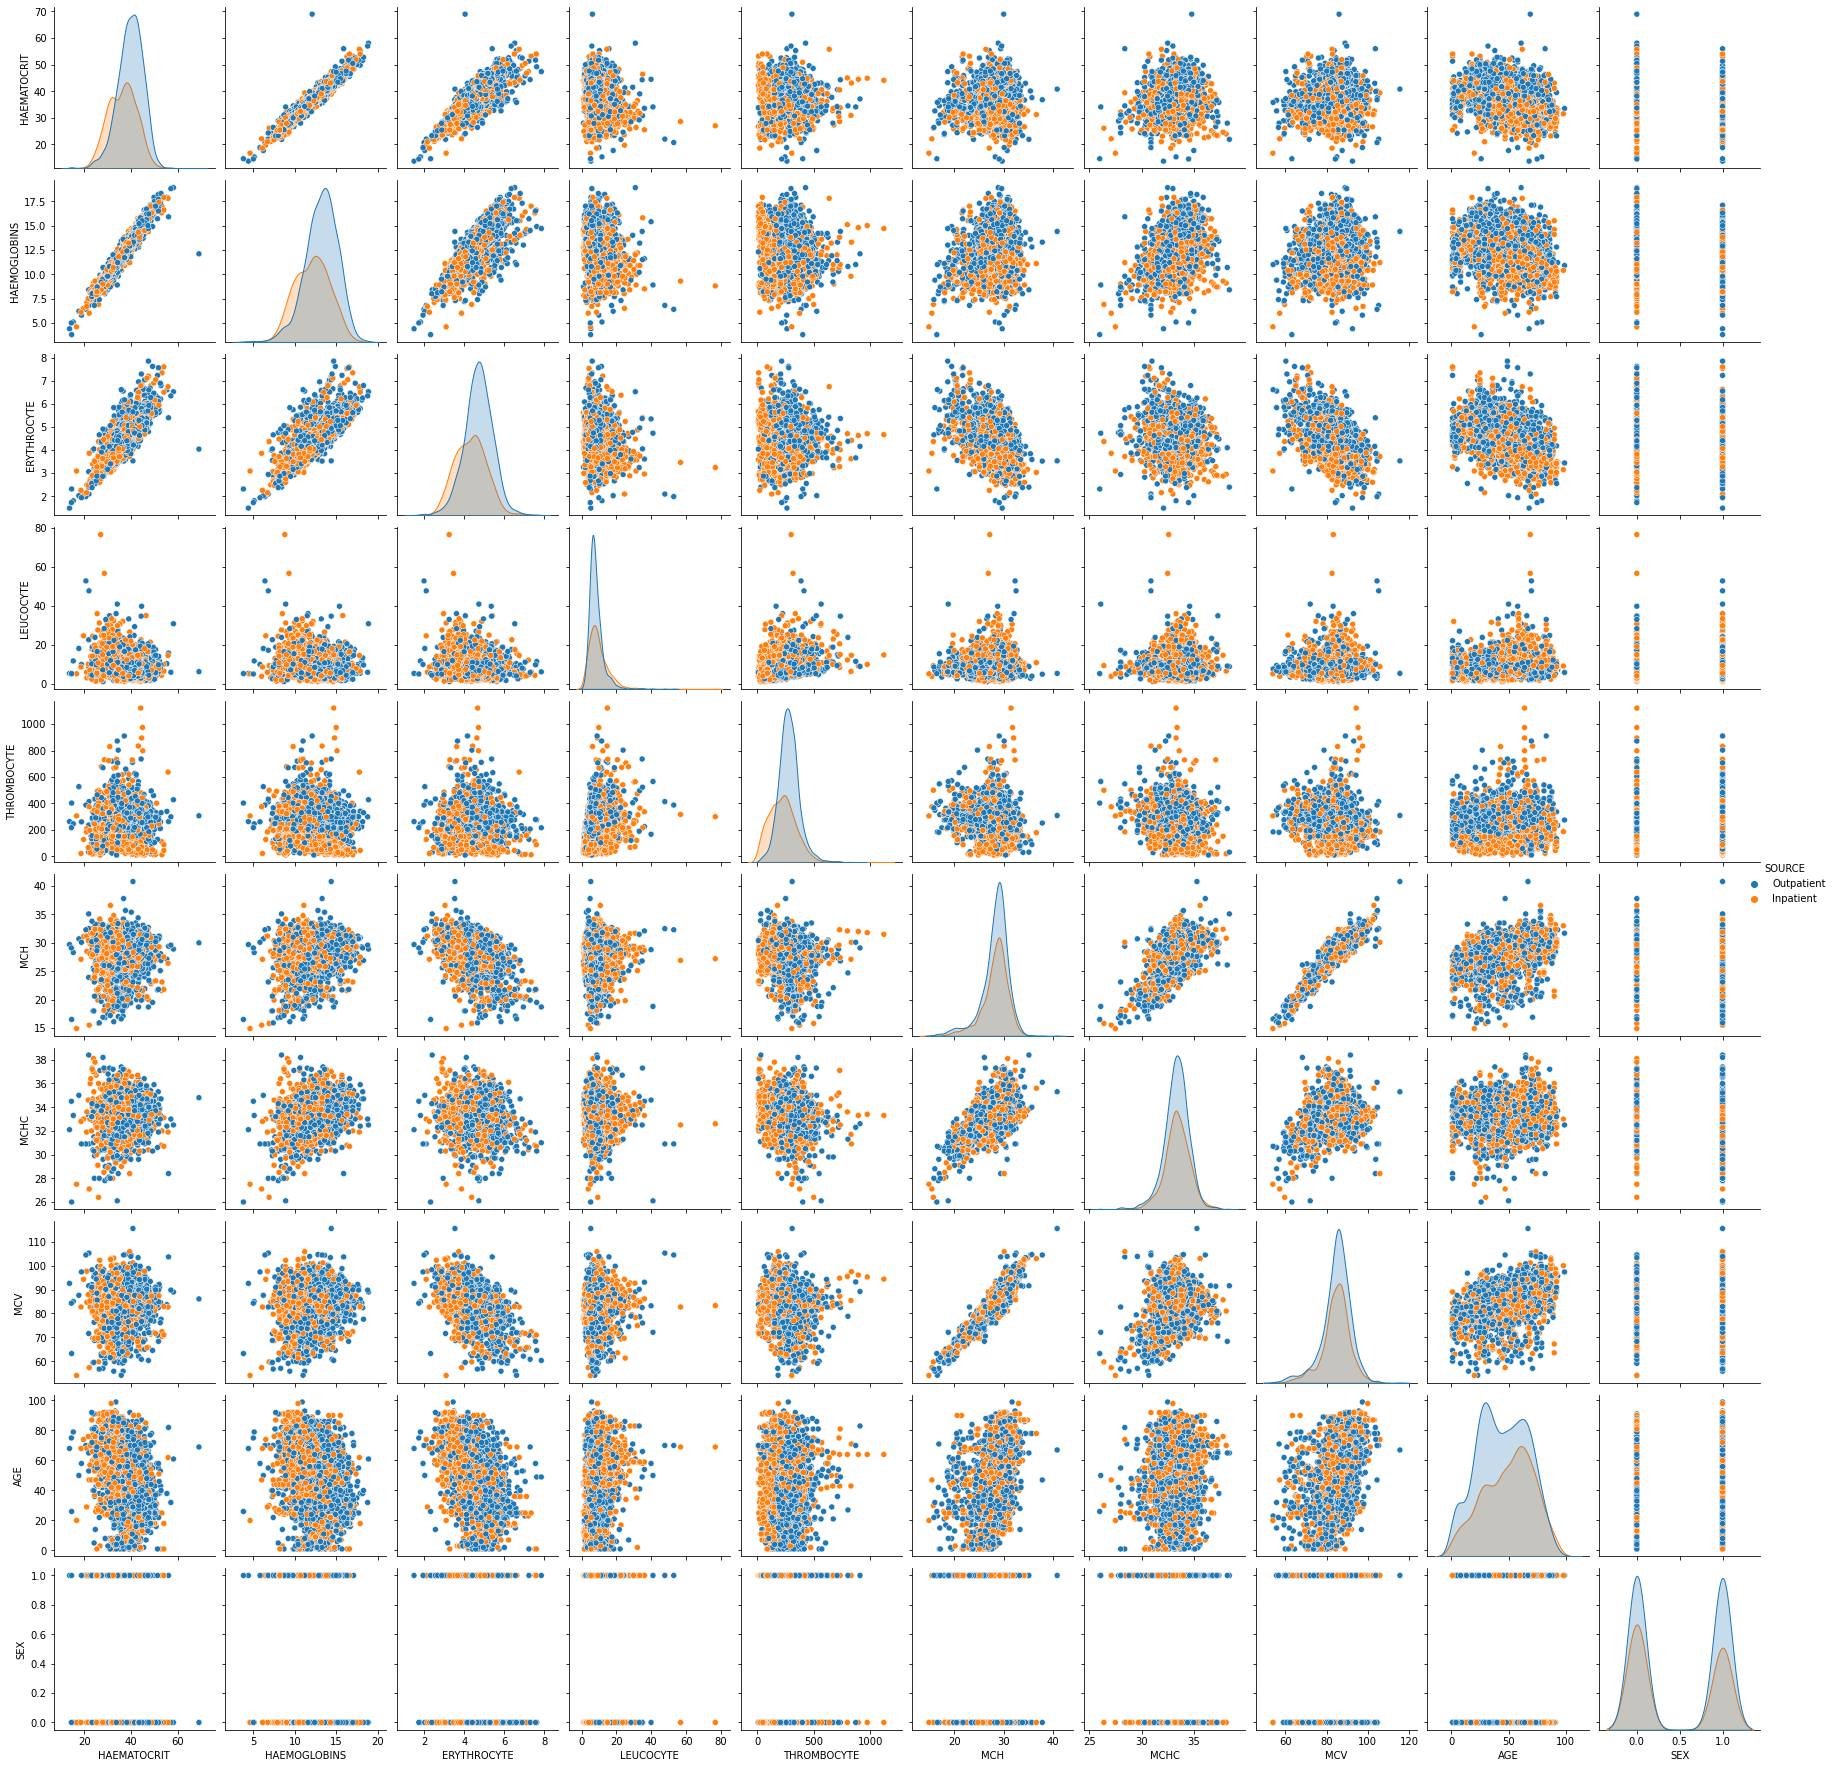

In [9]:
#plotting pairplot to see how the data are scattered based on the target variable
print("We can further modify the graph using the pairplot to determine what data fall under Inpatient or Outpatient")

_sns_pairplot_data = sns.pairplot(patient_data, hue='SOURCE')

#Updating the legend label for ease. 
new_labels = ['Outpatient', 'Inpatient']
for t, l in zip(_sns_pairplot_data._legend.texts, new_labels): 
    t.set_text(l)

In the graph above, the blue dots/area denotes the Outpatient care where as orange marks the Inpatient care. 
We can see there are few outliers in this graph as well. <br/>
Looking at the graph, from the age and gender column, we can see that the blue and orange dots are dispersed evenly, which might indicate that these fields does not factor in determining the type of care a patient requires. 
However, fields such as Haematocrit, Haemoglobins, Erythrocyte, Leucocyte and Thrombocyte looks to have high impact on determining the type. When the value for these are low, the patient are tend to be admitted to the medical facility.

### Algorithm Implementation and Statistical Tests 

Implementing the K-NN (K-Nearest Neighbour) algorithm to predict the classification of the Inpatient/Outpatient patient. <br/>
From the above graph we saw that **Haematocrit, Haemoglobins, Erythrocyte, Leucocyte and Thrombocyte** fields looked highly impacting on the classification of the target variable, we will consider these fields to see how well the algorithm could be trained. 

In [10]:
#Selecting the predictor variables and target variable.
predictor_variables = patient_data[['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE']]
target_variable = patient_data[['SOURCE']]

#Splitting the data into training/test sets. 
#The X_ stores the data of predictor variables and y_ stores the data for target variable. 
#Since, the dataset has 3309 rows, splitting data to 75% training and 25% test set.
X_train, X_test, y_train, y_test = train_test_split(
    predictor_variables, target_variable, test_size=0.25, random_state=0)

#Validating the shape of the training and test sets.
print("The shape of the training set: {}{}".format(X_train.shape, y_train.shape))
print("The shape of the test set: {}{}".format(X_test.shape, y_test.shape))

#As we have seen above, the range for each field differs from the other 
#and since all of the fields were slightly skewed, we will use the Min Max Normalization method to scale our data.
scaler = MinMaxScaler()

#Computing the min and max for scaling and transforming each feature to the range between 0 and 1
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Picking the value of k using the square root of the total number of training instances and Initiailzing the knn algorithm.
value_k = int(sqrt(X_train.shape[0]))

classifier = KNeighborsClassifier(n_neighbors=value_k) 
#np.ravel is used to transform the multidimensional to a one-dimensional 
classifier.fit(X_train, np.ravel(y_train, order='C'))

prediction_score = classifier.score(X_test, y_test)
print("The prediction accuracy for the test data is: {} with value of k = {}"
      .format(round(prediction_score*100,2), value_k))

The shape of the training set: (2481, 5)(2481, 1)
The shape of the test set: (828, 5)(828, 1)
The prediction accuracy for the test data is: 74.03 with value of k = 49


### Performance Improvement

In [11]:
#Creating the classification report for the test dataset. We need the prediction matrix to create the report.
predictions = classifier.predict(X_test)

print("The classification report is as follows: \n{}".format(classification_report(y_test, predictions)))

The classification report is as follows: 
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       506
           1       0.71      0.55      0.62       322

    accuracy                           0.74       828
   macro avg       0.73      0.71      0.71       828
weighted avg       0.74      0.74      0.73       828



The overall accuracy obtained is 74% on the test data with 26% error rate (1-prediction accuracy). The prediction of Outpatient is higher and the sensitivity for this is 75%. However, the sensitivity score for correctly identifying Inpatient data is lower with 71%. 

In [12]:
#Creating the confusion matrix for the prediction
#As per the document, the count of true negatives is C[0,0], false negatives is C[1,0], true positives is C[1,1] and 
#false positives is C[0,1]
matrix_data = pd.DataFrame(confusion_matrix(y_test, predictions), index=['F', 'T'], columns=['F', 'T'])
print("The confusion matrix looks like this: \n{}\n".format(matrix_data))

print("The AUROC value is: {}".format(roc_auc_score(y_test, predictions)))

The confusion matrix looks like this: 
     F    T
F  435   71
T  144  178

The AUROC value is: 0.706239412761152


We can see that there are lot of False negatives. This might be due to the overfitting of the data. <br/>
The AUROC value is about 0.71 which identifies that the separability has not been achieved efficiently. 

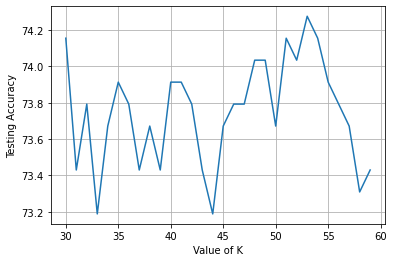

In [13]:
#Testing the rate of accuracy with different value for k. Taking the range from 30 to 60
#The values are stored in a list and a line graph will be plotted to visualize. 

from sklearn.metrics import accuracy_score
scores = []

for k in range(30,60):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, np.ravel(y_train, order='C'))
    scores.append(knn.score(X_test, y_test)*100)
    
plt.plot(range(30,60), scores)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')
plt.grid()
plt.show()

With providing different values for k, we can see that the highest accuracy was found when value of k is between 50 and 55. 

In [14]:
#Optimizing the k-nn algorithm using the k-fold Cross-validation with 10 folds. 
#This method will determine how well the knn algorithm works with the dataset. 
#We will be using the entire dataset for the cross-validation, thus we need to scale all the data. 

scaler = MinMaxScaler()
scaler.fit(predictor_variables) 

predictor_variables = scaler.transform(predictor_variables)

#Using the k value for knn same as previous. (k = 49)
knn = KNeighborsClassifier(n_neighbors=49)
cv_scores = cross_val_score(knn, predictor_variables, np.ravel(target_variable, order='C'), cv = 10)
print("The cross-validation scores are: \n{}\n".format(cv_scores))
print("The testing accuracy with the 10-fold cross-validation is: {}".format(np.mean(cv_scores)*100))

The cross-validation scores are: 
[0.71601208 0.6918429  0.76132931 0.72205438 0.71299094 0.71601208
 0.71601208 0.75528701 0.7673716  0.73636364]

The testing accuracy with the 10-fold cross-validation is: 72.95276023070585


We have got a testing accuracy of 73% and the features that are used were based on the interpretation of the graphs. <br/>
Using Random Forest Regression ensembler we can list out the important features that contribute more on categorization of the type of care required for the patient. 

The feature importance scores obtained are: 
THROMBOCYTE     0.225086
LEUCOCYTE       0.143786
ERYTHROCYTE     0.119877
AGE             0.109563
HAEMATOCRIT     0.105026
MCHC            0.082303
MCV             0.078894
MCH             0.060710
HAEMOGLOBINS    0.058386
SEX             0.016368
dtype: float64



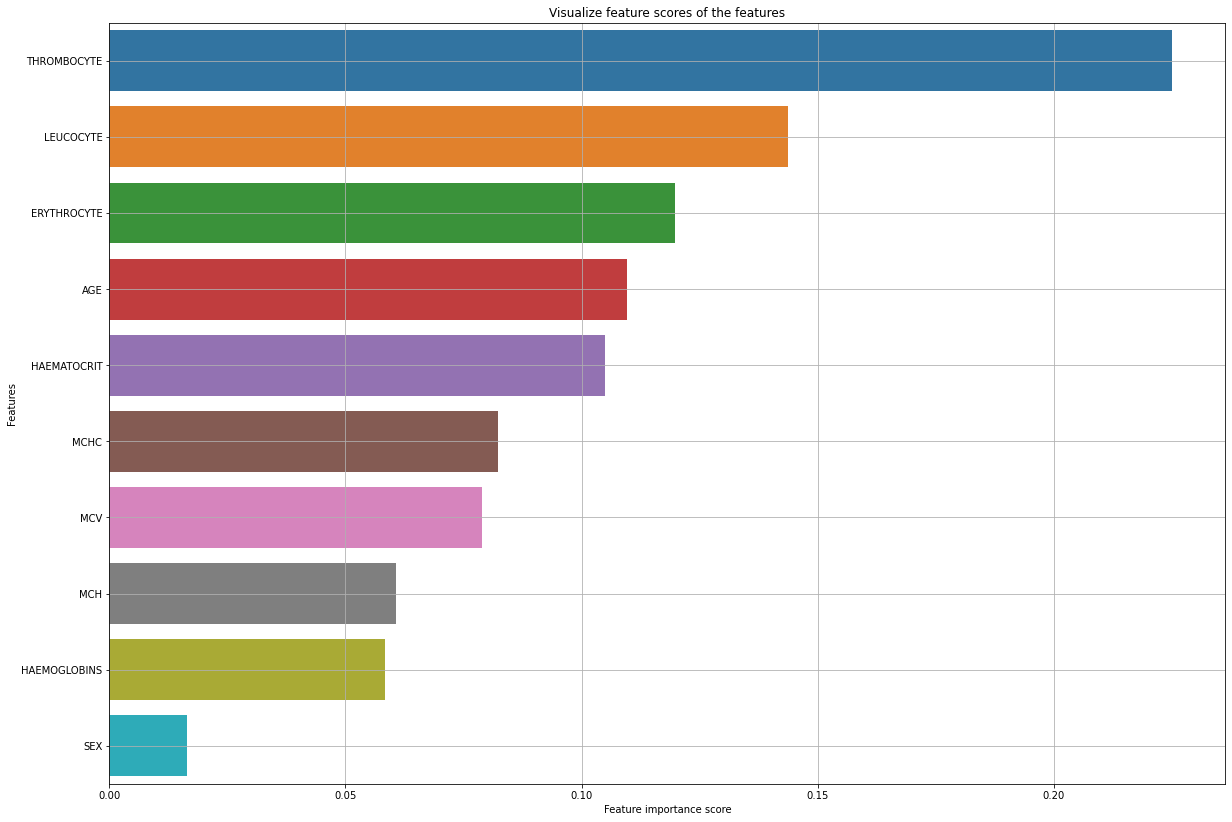

In [15]:
pred_variables = patient_data.iloc[:, 0:10]
targ_variables = patient_data['SOURCE']

A_train, A_test, b_train, b_test = train_test_split(pred_variables, targ_variables, test_size=0.25, random_state=1)

#Using 100 trees for the Random Forest Regressor. 
rf = RandomForestRegressor(n_estimators=100)
rf.fit(A_train, b_train)

#Sorting the indexes of the list based on the values of the random forest regressor
sorted_idx = rf.feature_importances_.argsort()

feature_scores = pd.Series(rf.feature_importances_, index=A_train.columns).sort_values(ascending=False)

print("The feature importance scores obtained are: \n{}\n".format(feature_scores))

f, ax = plt.subplots(figsize=(20, 14))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=patient_data.T)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
ax.grid()
plt.show()


From the above Feature importance score, we can see that the top 5 features that has major influences are :
1. Thrombocyte
2. Leucocyte
3. Erythrocyte
4. Haematocrit 
5. Age 

The least important feature is the sex field. 

Only one feature was wrongly identified earlier from the graph. We can find the accuracy score using k-fold cross-validation with the above features to determine if there are any changes in the testing accuracy for the no of neighbors ranging from 1 to 60. 

In [16]:
predictor_variables = patient_data[['THROMBOCYTE', 'LEUCOCYTE', 'ERYTHROCYTE', 'HAEMATOCRIT', 'AGE']]
target_variables = patient_data[['SOURCE']]

scaler = MinMaxScaler()
scaler.fit(predictor_variables)

predictor_variables = scaler.transform(predictor_variables)

scores = []
mean_scores = []
for k in range(1, 60):
    classifier = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(classifier, predictor_variables, np.ravel(target_variables, order='C'), cv=10)
    scores.append(cv_scores)
    mean_scores.append(np.mean(cv_scores)*100)

k_mean_score = [(mean, k) for k, mean in enumerate(mean_scores)]
k_mean_score.sort(reverse=True)

#Printing the top 10 predictions accuracy 
for i in range(0,20):
    print("The prediction accuracy of {}% is found for k={}".format(round(k_mean_score[i][0],2), k_mean_score[i][1]+20))

The prediction accuracy of 73.83% is found for k=48
The prediction accuracy of 73.71% is found for k=46
The prediction accuracy of 73.62% is found for k=42
The prediction accuracy of 73.62% is found for k=50
The prediction accuracy of 73.59% is found for k=44
The prediction accuracy of 73.59% is found for k=58
The prediction accuracy of 73.59% is found for k=57
The prediction accuracy of 73.56% is found for k=49
The prediction accuracy of 73.56% is found for k=59
The prediction accuracy of 73.53% is found for k=43
The prediction accuracy of 73.47% is found for k=41
The prediction accuracy of 73.47% is found for k=47
The prediction accuracy of 73.47% is found for k=52
The prediction accuracy of 73.47% is found for k=56
The prediction accuracy of 73.44% is found for k=51
The prediction accuracy of 73.41% is found for k=60
The prediction accuracy of 73.38% is found for k=45
The prediction accuracy of 73.38% is found for k=53
The prediction accuracy of 73.37% is found for k=54
The predicti

Here based on the 10-fold cross-validation for k with range from 1 to 60, we can see majority of them has a prediction accuracy of 74% which was similar to the first attempt. <br/>
Also, accuracy of 73% is obtained for k = 47 which is near to the k value that was obtained by computing the square root of the total number of training data sample. <br/>
Thus, we can confirm that the value of k taken as 49 is efficient. 

Max train score 100.0 % and k = [1]
Max test score 73.79227053140096 % and k = [20]


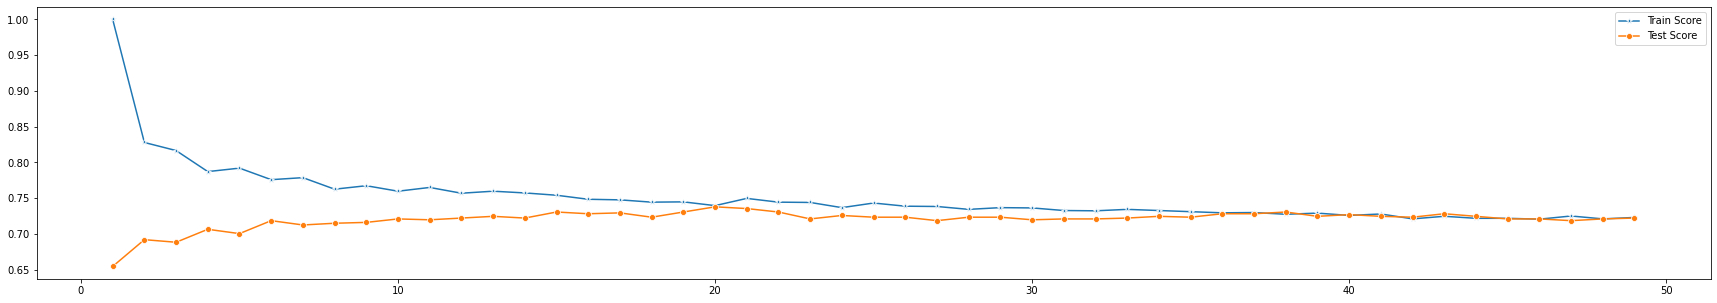

In [17]:
#Plotting the graph for different training scores and test scores to create an evaluation based on train-test scores.
test_scores = []
train_scores = []

predictor_variables = patient_data[['THROMBOCYTE', 'LEUCOCYTE', 'ERYTHROCYTE', 'HAEMATOCRIT', 'AGE']]
target_variables = patient_data[['SOURCE']]

X_train, X_test, y_train, y_test = train_test_split(predictor_variables, target_variables, test_size=0.25, random_state=4)

for k in range(1,50):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    
## Training Evaluation
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

## Testing Evaluation
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

## Train Test Evaluation
plt.figure(figsize=(30,5))
p = sns.lineplot(range(1,50),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,50),test_scores,marker='o',label='Test Score')

In the above evaluation of the training and testing data set, we can find a similar graph to that of bias-variance decomposition. <br/>
The max train score is 100% at k = 1. When the value of k is lower we can see the data is underfitting due to bias. Similarly the graph displays that the prediction accuracy are low for lower value of k. This represents the overfitting of data due to variances obtained in the dataset. <br/>
As the value of k increases the training and testing accuracy aligns with average of 74%. The highest value of test score is 73% for k = 20. <br/>
We find that for larger value of k where the train score and test score matches and are align, we obtain a optimium model complexity with minimum error. 

### Conclusion

From the findings obtained using the k-nn algorithm, we were able to obtain an approx. prediction accuracy of 74%. Among 10 features listed, 5 of the features put up more weightage in determining whether the patient needs Inpatient care or Outpatient care. However, almost all the features listed are all related to blood test. Thus, the data presented to us might be underfitting as it points on the condition of a patient's blood level in different aspects. 

As we know, different factors and conditions are checked before a patient is admitted to a medical facility, therefore, other new features might be needed to categorize the prediction more accurately. Other features on the severity of the condition and other lab test would be good to have, to increase the accuracy.

Also, from the confusion matrix, we can see that high number of true negatives and false positives are predicted. This shows that the dataset is not efficient in predicting the outcomes as 26% of the overall test data were predicted inaccurately. 

These kind of prediction would make easy to make decision on whether to hold a patient at the medical facility given their current condition and laboratory tests. Also, we can look to add features that could determine the length of the stay based on the data. 